In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp "/content/drive/MyDrive/School  Học/Data Science/kaggle.json" ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download aiml-club-21-days-machine-learning-code-a-thon-2

  0% 0.00/381 [00:00<?, ?B/s]
100% 381/381 [00:00<00:00, 563kB/s]


In [ ]:
! unzip aiml-club-21-days-machine-learning-code-a-thon-2.zip

Archive:  aiml-club-21-days-machine-learning-code-a-thon-2.zip
  inflating: Salary_Data (1).csv     


In [ ]:
import pandas as pd

train= pd.read_csv('Salary_Data (1).csv')
train
train.shape


print(train)

    YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872


In [ ]:
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X=train.drop("Salary", axis=1)
y=train["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

reg=LinearRegression()
reg.fit(X_train,y_train)

predictions= reg.predict(X_test)

print(predictions)



[ 74560.54611258  47107.49667406  68880.60484944 111480.16432301
  54680.75169158  76453.85986696]


In [ ]:
print(X.shape)
print(y.shape)

(30, 1)
(30,)


Plot the data, renember to have enough y for X


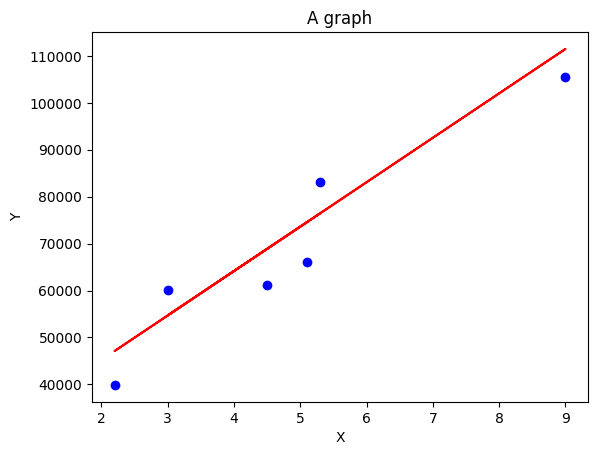

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test,y_test, color="Blue")

plt.plot(X_test, predictions, color="Red")
plt.title("A graph")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

RMSE and Rsquared

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

r_squared = reg.score(X_test,y_test)

rmse= mean_squared_error(y_test, predictions)

print(r_squared)
print(rmse)

0.8839476512584652
48990782.929892026


Cross validation w KFolds

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

kf= KFold(n_splits= 6, shuffle=True, random_state= 36)

cv_results= cross_val_score(reg, X, y, cv=kf)

print(f"The CV result is {cv_results[:5]}")

The CV result is [0.96613599 0.92627535 0.93529717 0.78091197 0.97426779]


Mean, Standard Deviation,. 95% confidence

In [ ]:
import numpy as np
print(np.mean(cv_results))

print(np.std(cv_results))

print(np.quantile(0.025,0.975))

0.8386492682419857
0.18566045386621008
0.025


In [ ]:
! pip install numpy

Regularized regrssion: Ridge..  

Computes the squared values, will print R_squared


In [ ]:
from sklearn.linear_model import Ridge

ridge_scores=[]
alphas=[0.1,1.0,10.0,100.0,1000.0,10000.0]

for alpha in alphas:
  ridge=Ridge(alpha=alpha)
  ridge.fit(X_train,y_train)
  score=ridge.score(X_test,y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.883954259603897, 0.8839906482519772, 0.8822769057421741, 0.7733583232080343, 0.16157318543590649, -0.12407126716871564]


Sees how each column affect the y( the dependent variable)

[9466.53345867]


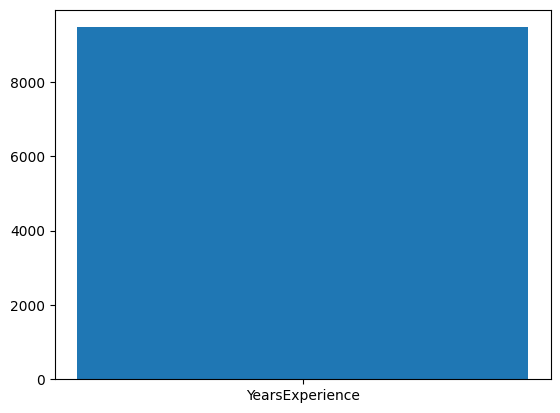

In [ ]:
from sklearn.linear_model import Lasso

X_columns= X.columns # important for plotting

lasso=Lasso(alpha=0.3)


lasso.fit(X_train,y_train)
lasso_coef= lasso.coef_
print(lasso_coef)
plt.bar(X_columns, lasso_coef)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]]
              precision    recall  f1-score   support

       37731       0.00      0.00      0.00       0.0
       39891       0.00      0.00      0.00       1.0
       43525       0.00      0.00      0.00       0.0
       55794       0.00      0.00      0.00       0.0
       60150       0.00      0.00      0.00       1.0
       61111       0.00      0.00      0.00       1.0
       66029       0.00      0.00      0.00       1.0
       83088       0.00      0.00      0.00       1.0
      101302       0.00      0.00      0.00       0.0
      105582       0.00      0.00      0.00       1.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_probs=logreg.predict(X_test)

print(y_pred_probs[:10])

[ 67938  39343  57081 112635  43525  67938]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
